In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [13]:
local_importance = pd.read_csv("../local_importance.csv", index_col=0)
df_training = pd.read_csv("../output.csv")
feature_cols_top = local_importance.columns.to_list()
feature_cols_top

['CountProt',
 'Mass',
 'PepLen',
 'Score_processed_mascot_1_0_0',
 'Score_processed_msfragger_20190222',
 'Score_processed_msgfplus_v2018_06_28',
 'Score_processed_omssa_2_1_9',
 'Score_processed_xtandem_vengeance',
 'delta_score_2_msfragger_20190222',
 'delta_score_2_msgfplus_v2018_06_28',
 'delta_score_3_msfragger_20190222',
 'delta_score_3_msgfplus_v2018_06_28',
 'enzInt',
 'lnNumPep']

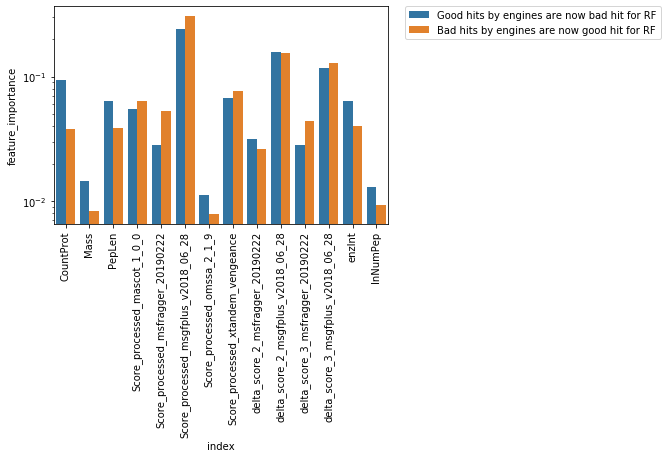

In [15]:
q_val_cols = [c for c in df_training if "q-value" in c and "RF-reg" not in c]
local_importance["q-engines_mean"] = df_training[q_val_cols].mean(axis=1)
local_importance["q-RF-reg"] = df_training["q-value_RF-reg"]
local_importance["diff"] = local_importance["q-engines_mean"].between(0.15,1) & local_importance["q-RF-reg"].between(0, 0.05)

diff_means = pd.DataFrame(local_importance[local_importance["diff"]][feature_cols_top].mean(axis=0).rename("feature_importance"))
diff_means["difference"] = "Bad hits by engines are now good hit for RF"
same_means = pd.DataFrame(local_importance[~local_importance["diff"]][feature_cols_top].mean(axis=0).rename("feature_importance"))
same_means["difference"] = "Good hits by engines are now bad hit for RF"
df_plot = pd.concat([same_means, diff_means], axis=0).reset_index()
ax = sns.barplot(x="index", y="feature_importance", hue="difference", data=df_plot)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()